In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mtcnn import MTCNN
import cv2
from retinaface import RetinaFace
from tensorflow import expand_dims

# Import Data

In [85]:
detector = MTCNN()
image = cv2.imread('../raw_data/foto.jpg')
cropped_faces = []
faces = detector.detect_faces(image)
#to draw faces on image
for result in faces:
    x, y, w, h = result['box']
    x1, y1 = x + w, y + h
    cv2.rectangle(image, (x, y), (x1, y1), (0, 0, 255), 2)
    cropped_faces.append((x1,y1,x,y))
img2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

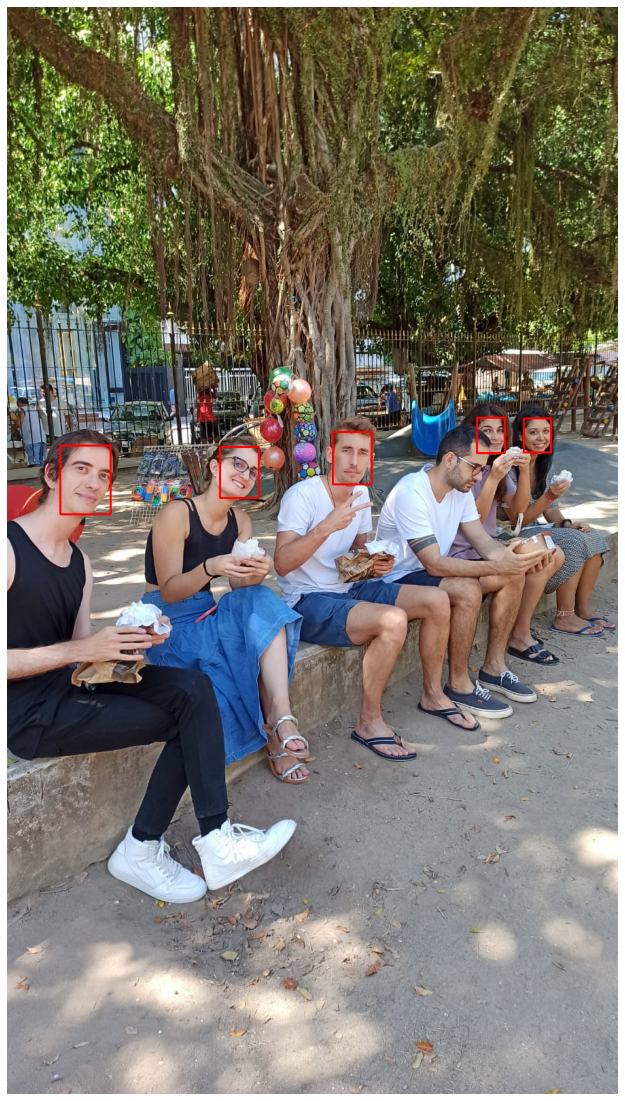

In [86]:
fig = plt.figure(figsize=(16,20))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [92]:
resp = RetinaFace.detect_faces("../raw_data/foto.jpg")

In [93]:
resp

{'face_1': {'score': 0.9996229410171509,
  'facial_area': [75, 645, 155, 748],
  'landmarks': {'right_eye': [110.35551, 681.9297],
   'left_eye': [142.72568, 692.71075],
   'nose': [127.976875, 705.9033],
   'mouth_right': [102.96949, 715.91077],
   'mouth_left': [131.25584, 725.244]}},
 'face_2': {'score': 0.9994262456893921,
  'facial_area': [310, 649, 371, 724],
  'landmarks': {'right_eye': [344.056, 674.8106],
   'left_eye': [364.2891, 689.6183],
   'nose': [354.318, 692.4659],
   'mouth_right': [332.01053, 696.42395],
   'mouth_left': [350.32227, 708.5117]}},
 'face_3': {'score': 0.9994059801101685,
  'facial_area': [479, 626, 536, 702],
  'landmarks': {'right_eye': [497.5314, 654.24774],
   'left_eye': [524.2918, 657.63983],
   'nose': [510.68524, 672.7913],
   'mouth_right': [496.8607, 682.51556],
   'mouth_left': [518.01855, 685.3422]}},
 'face_4': {'score': 0.9990690350532532,
  'facial_area': [689, 604, 733, 660],
  'landmarks': {'right_eye': [706.9649, 625.39233],
   'left_e

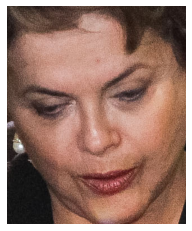

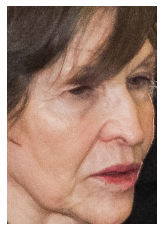

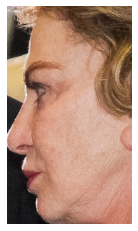

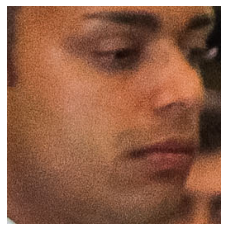

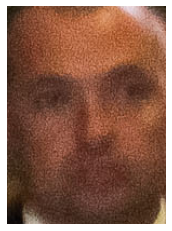

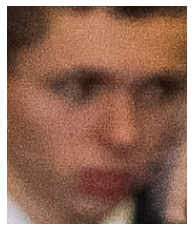

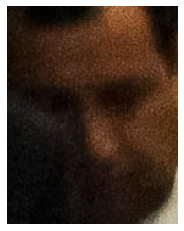

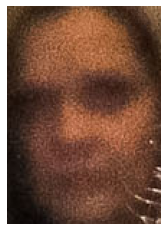

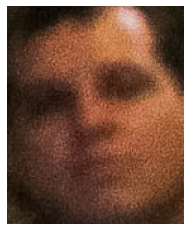

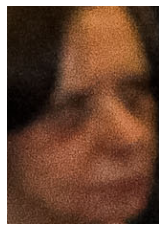

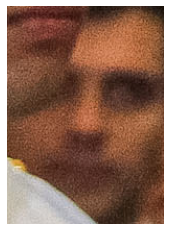

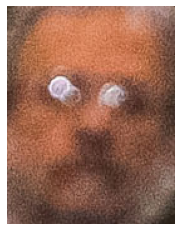

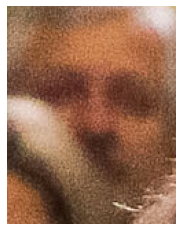

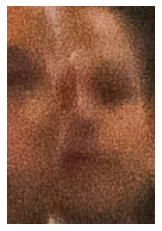

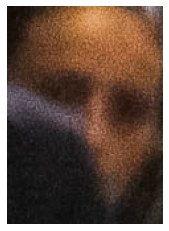

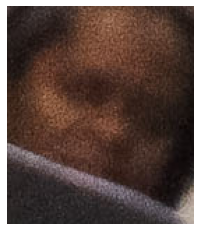

In [114]:
import matplotlib.pyplot as plt
faces = RetinaFace.extract_faces(img_path = "../raw_data/foto_vel.jpg", 
                                 align = False)
for face in faces:
  plt.imshow(face)
  plt.axis('off')
  plt.show()

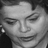

In [115]:
import PIL.Image
face_bw = PIL.Image.fromarray(faces[0]).convert("L").resize((48, 48), PIL.Image.ANTIALIAS)
face_bw

In [116]:
im = np.array(face_bw)
im = (im/255) -0.5

im = expand_dims(im, axis=0)
im = expand_dims(im, axis=-1)


import joblib
model = joblib.load('../model.joblib')

results = model.predict(im)[0]


In [117]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear',
                   3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


In [118]:
emotion_map.get(results.argmax())

'Sad'

In [119]:

data = np.zeros(shape=(len(faces), 48, 48), dtype = 'float64')

data.shape

(16, 48, 48)

In [120]:
for i, face in enumerate(faces):
    face_bw = np.array(PIL.Image.fromarray(faces[i])
               .convert("L")
               .resize((48, 48), PIL.Image.ANTIALIAS))
    data[i]=face_bw
    

In [121]:
data = (data/255) -0.5

In [122]:
data = expand_dims(data, axis=-1)
data.shape

TensorShape([16, 48, 48, 1])

In [123]:
model = joblib.load('../model.joblib')
results = model.predict(data)

In [124]:
results.shape

(16, 7)

In [125]:
results.argmax(axis = 1)

array([4, 4, 4, 4, 6, 4, 4, 0, 6, 4, 4, 3, 3, 4, 4, 4])

In [126]:
np.vectorize(emotion_map.get)(results.argmax(axis = 1))

array(['Sad', 'Sad', 'Sad', 'Sad', 'Neutral', 'Sad', 'Sad', 'Angry',
       'Neutral', 'Sad', 'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad'],
      dtype='<U7')

In [135]:
np.mean(results,axis=0)

array([0.178112  , 0.00655485, 0.1442469 , 0.13510458, 0.32760888,
       0.02720595, 0.18116678], dtype=float32)

In [144]:
emotion_df = pd.DataFrame(data={'Emotion': emotion_map.values(), 
              'Percentage': np.mean(results,axis=0)})

In [147]:
emotion_df = emotion_df.sort_values(by='Percentage',ascending=False)
emotion_df.head(3)

,Emotion,Percentage
4,Sad,0.327609
6,Neutral,0.181167
0,Angry,0.178112
